##**분류 실습 - 캐글 산탄데르 고객 만족 예측**

**산탄데르 고객 만족(Santander Customer Satisfaction)**

**데이터 구성**
- 370개의 피처로 구성
- 피처 이름은 모두 익명처리가 되어있음
- 클래스 레이블 명은 TARGET으로, 이 값이 1이면 불만을 가진 고객, 0이면 만족한 고객을 의미


**데이터 전처리**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ train_santander.csv', encoding='latin-1')
print('dataset shape', cust_df.shape)
cust_df.head(3)


dataset shape (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


위에서 언급했듯 클래스값 칼럼을 포함한 피처가 371개 존재한다.

각 피처의 타입과 Null값을 알아보자.

In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


111개의 피처가 float형, 260개의 피러가 int 형으로 모든 피처가 숫자형임을 알 수 있고, Null값은 없는 것을 확인할 수 있다.

이제 전체 데이터에서 만족과 불만족의 비율을 살펴보자. 이는 레이블이 Target 속성값의 분포를 알아보면 알 수 있다. 대부분이 만족이고 불만족인 고객은 약 4% 밖에 되지 않는 것을 알 수 있다.

In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


각 피처의 값 분포를 간단히 확인해보자.

In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


var3 칼럼의 경우 min값이 -999999이다. 이때 이 값은 다른 값에 비해 너무 편차가 심하기 때문에 이를 가장 값이 많은 2로 변환하도록 하자. 또한 ID 피처는 단순 식별자에 불과하므로 피처를 드롭하고, 클래스 데이터 세트와 피처 데이터 세트를 분리하여 별도의 데이터 세트로 저장하도록 하자

In [6]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features=cust_df.iloc[:,:-1]
y_labels=cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


이제 학습과 성능 평가를 위해 원본 데이터 세트에서 학습 데이터 세트와 테스트 데이터 세트를 분리하자. 비대칭한 데이터 세트이므로 클래스인 Target값 분포도가 학습 데이터와 테스트 데이터 세트에 모두 비슷하게 추출 됐는지 확인하자.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape: {1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/ test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape: (15204, 369)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


학습과 테스트 데이터 세트 모두 TARGET 값의 분포가 원본 데이터와 유사하게 전체 데이터의 4%정도로 불만족 값으로 만들어진것을 확인할 수 있다.

이제 XGBoost의 조기 중단의 검증 데이터 세트로 사용하기 위해 X_train, y_train을 다시 쪼개 학습과 검증 데이터 세트로 만들자.

In [8]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

**XGBoost 모델 학습과 하이퍼 파라미터 튜닝**

먼저 XGBoost의 학습 모델을 생성하고 예측 결과를 ROC AUC 로 평가하도록 하자. 이는 사이킷런 래퍼인 XGBClassifier를 기반으로 학습을 수행한다. 이때 n_estimators는 500으로 하되 early_stopping rounds을 100으로 설정하자. 여기서 성능 평가 기준이 ROC-AUC이므로 XGBClassifier의 eval_metrics를 이용하여 eval_set를 설정하고, 100회로 조기 중단을 설정한 뒤, 학습을 진행하여 테스트 데이터 세트로 평가된 ROC-AUC 값을 확인하자.

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, learninge_rate=0.05, random_state=156, early_stopping_rounds=100, eval_metric="auc")

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83633	validation_1-auc:0.81797
[1]	validation_0-auc:0.84346	validation_1-auc:0.82225
[2]	validation_0-auc:0.85159	validation_1-auc:0.82629
[3]	validation_0-auc:0.85658	validation_1-auc:0.82733
[4]	validation_0-auc:0.85994	validation_1-auc:0.82893
[5]	validation_0-auc:0.86367	validation_1-auc:0.83023
[6]	validation_0-auc:0.86655	validation_1-auc:0.83147
[7]	validation_0-auc:0.87043	validation_1-auc:0.83176
[8]	validation_0-auc:0.87448	validation_1-auc:0.83279
[9]	validation_0-auc:0.87701	validation_1-auc:0.83323
[10]	validation_0-auc:0.87984	validation_1-auc:0.83297
[11]	validation_0-auc:0.88166	validation_1-auc:0.83371
[12]	validation_0-auc:0.88303	validation_1-auc:0.83467
[13]	validation_0-auc:0.88459	validation_1-auc:0.83525
[14]	validation_0-auc:0.88583	validation_1-auc:0.83497
[15]	validation_0-auc:0.88657	validation_1-auc:0.83509
[16]	validation_0-auc:0.88853	validation_1-auc:0.83571
[17]	validation_0-auc:0.89001	validation_1-auc:0.83583
[18]	validation_0-au

테스트 데이터 세트로 예측시 ROC AUC는 약 0.8429이다.

이제 HyperOpt를 이용하여 베이지안 최적화 기반으로 XGBoost의 하이퍼 파라미터 튜닝을 수행하자.

In [27]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, mon_child_weight는 1에서 6까지 1 간격으로
#colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }


다음으로 목적 함수를 만들어 보자. 목적 함수는 3 Fold 교차 검증을 이용하여 평균 ROC-AUC 값을 반환하되, -1을 곱해주어 최대 ROC-AUC값이 최소 반환값이 되게 하자.  

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

#fmin()에서 호출 시 search_space값으로 XGBClassifier 교차 검증 학습 후 -1*roc_auc 평균 값을 반환.
def objective_func(search_space):
  xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          colsample_bytree=search_space['colsample_bytree'],
                          learning_rate=search_space['learning_rate'],
                          early_stopping_rounds=30, eval_metric='auc')

  #3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
  roc_auc_list= [ ]

  #3개의 k-fold 방식 적용
  kf=KFold(n_splits=3)

  #X_traind을 다시 학습과 검증용 데이터로 분리
  for tr_index,val_index in kf.split(X_train):
      #kf.splict(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
      X_tr,y_tr=X_train.iloc[tr_index],y_train.iloc[tr_index]
      X_val,y_val=X_train.iloc[val_index],y_train.iloc[val_index]

      #early stopping 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
      xgb_clf.fit(X_tr, y_tr,eval_set=[(X_tr, y_tr),(X_val, y_val)])

      #1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음
      score=roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
      roc_auc_list.append(score)

  #3개의 kfold 로 계산된 roc_auc 값을 평균값을 반환하되
  #HyperOpt로 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한뒤 반환
  return -1*np.mean(roc_auc_list)


In [ ]:
from hyperopt import fmin, tpe,Trials
trials = Trials()

#fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, #최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[29]	validation_0-auc:0.87996	validation_1-auc:0.83477
[30]	validation_0-auc:0.88068	validation_1-auc:0.83538
[31]	validation_0-auc:0.88142	validation_1-auc:0.83498
[32]	validation_0-auc:0.88218	validation_1-auc:0.83521
[33]	validation_0-auc:0.88287	validation_1-auc:0.83500
[34]	validation_0-auc:0.88348	validation_1-auc:0.83524
[35]	validation_0-auc:0.88385	validation_1-auc:0.83585
[36]	validation_0-auc:0.88472	validation_1-auc:0.83604
[37]	validation_0-auc:0.88510	validation_1-auc:0.83628
[38]	validation_0-auc:0.88565	validation_1-auc:0.83633
[39]	validation_0-auc:0.88623	validation_1-auc:0.83636
[40]	validation_0-auc:0.88650	validation_1-auc:0.83648
[41]	validation_0-auc:0.88691	validation_1-auc:0.83634
[42]	validation_0-auc:0.88764	validation_1-auc:0.83627
[43]	validation_0-auc:0.88785	validation_1-auc:0.83641
[44]	validation_0-auc:0.88849	validation_1-auc:0.83632
[45]	validation_0-auc:0.88878	validation_1-auc:0.83654
[46]	validation_0-auc:0.88894

꺷-몇rk dlwjs dPwpdml 0.8429에서 하이퍼 파라미터 튜닝 이후 0.8457로 개선된 것을 확인할 수 있다.

이를 튜닝된 모델에서 각 피처의 중요도를 피처 중요도 그래프로 나타내보자.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

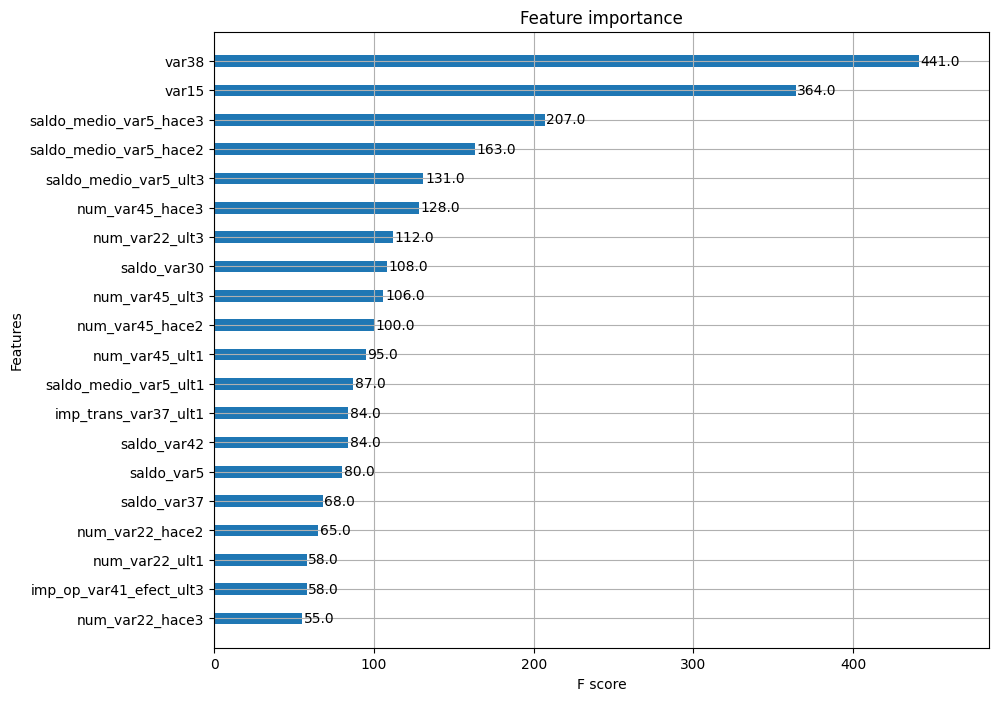

In [30]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

**LightGBM 모델 학습과 하이퍼 파라미터 튜닝**

앞서 만들어진 데이터 세트를 기반으로 LightGBM으로 학습을 수행하고 Roc-AUC를 측정해보자.

In [32]:
from lightgbm import LGBMClassifier
lgbm_clf=LGBMClassifier(n_estimators=500, early_stopping_rounds=100, eval_metric="auc")

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1902, number of negative: 46750
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.161949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13745
[LightGBM] [Info] Number of data points in the train set: 48652, number of used features: 248
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039094 -> initscore=-3.201908
[LightGBM] [Info] Start training from score -3.201908
Training un

여기서 해당 수행결과 ROC AUC는 0.8384나타난다. 이는 XGBoost보다 학습에 걸리는 시간이 좀 더 단축됐음을 느낄 수 있다.

이후 HyperOpt를 이용해 다양한 하이퍼 파라미터에 대한 튜닝을 수행해보자.

In [33]:
lgbm_search_space={'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                   'max_depth': hp.quniform('max_depth',100,160,1),
                   'min_child_samples': hp.quniform('min_child_samples',60,100,1),
                   'subsample': hp.uniform('subsample',0.7,1),
                   'learning_rate': hp.uniform('learning_rate',0.01,0.2)
                   }

이제 목적함수를 생성해보자

In [34]:
def objective_func(search_space):
    lgbm_clf=LGBMClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_samples=int(search_space['min_child_samples']),
                            subsample=search_space['subsample'],
                            learning_rate=search_space['learning_rate'],
                            early_stopping_rounds=30, eval_metric='auc')

    #3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= [ ]

    #3개의 k-fold 방식 적용
    kf=KFold(n_splits=3)

    #X_traind을 다시 학습과 검증용 데이터로 분리
    for tr_index,val_index in kf.split(X_train):
        #kf.splict(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr,y_tr=X_train.iloc[tr_index],y_train.iloc[tr_index]
        X_val,y_val=X_train.iloc[val_index],y_train.iloc[val_index]

        #early stopping 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr,eval_set=[(X_tr, y_tr),(X_val, y_val)])

        #1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음
        score=roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)

    #3개의 kfold 로 계산된 roc_auc 값을 평균값을 반환하되
    #HyperOpt로 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한뒤 반환
    return -1*np.mean(roc_auc_list)


이제 fmin()을 호출하여 최적 하이퍼 파라미터를 도출해보자

In [36]:
from hyperopt import fmin, tpe, trials_from_docs

trials = Trials()

# fmin() 함수를 호출, max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.104377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12827
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872
[LightGBM] [Info] Start training from score -3.205872
Training until va

이제 하이퍼 파라미터를 이용하여 LightGBM을 학습 후 테스트데이터 세트에서 ROC-AUC를 평가하자.

In [37]:
lgbm_clf=LGBMClassifier(n_estimators=500,
                        learning_rate=round(best['learning_rate'],5),
                        max_depth=int(best['max_depth']),
                        min_child_samples=int(best['min_child_samples']),
                        subsample=round(best['subsample'],5),
                        early_stopping_rounds=100, eval_metric='auc')

#evaluation metrics를 auc로 early stopping은 100으로 설정하고 학습 수행.
lgbm_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr),(X_val, y_val)])

lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1902, number of negative: 46750
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13331
[LightGBM] [Info] Number of data points in the train set: 48652, number of used features: 197
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039094 -> initscore=-3.201908
[LightGBM] [Info] Start training from score -3.201908
Training un

###**분류 실습 - 캐글 신용카드 사기 검출**
- 데이터 세트의 레이블이 class 속성은 매우 불균형한 분포를 가진
- Class는 0과 1로 분류되는데 0이 사기가 아닌 정상적인 신용카드 트랜잭션 데이터, 1은 신용카드 사기 트랜잭션을 의미
- 전체 데이터의 약 0.172%만이 레이블 값이 1, 즉 사기 트랜잭션임

**언더 샘플링과 오버 샘플링의 이해**
이상 레이블을 가지는 데이터 건수는 매우 적기 때문에 제대로 다양한 유형을 학습하지 못하는 반면 정상 레이블을 가지는 데이터 건수는 매우 많아 일방적으로 정상 레이블로 치우친 학습을 수행하여 제대로된 이상 데이터 검출이 어려워지기 쉽다.

이로인해 지도학습에서 극도로 불균형한 레이블 값 분포로 인한 문제점을 해결하기 위해 오버 샘플링과 언더 샘플링 방법을 이용하고, 오버 샘플링 방식이 예측 성능상 조금 유리한 경우가 많아 상대적으로 더 많이 사용된다.

In [38]:
#conda install -c conda-forge imbalanced-learn

** 데이터 일차 가공 및 모델 학습/예측/평가

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


여ㅣ선 보다 다양한 데이터 사전 가공을 수행하고, 이에 따른 예측 성능도 함께 비교해보자.
따라서 인자로 입력된 DataFrame을 복사하여 이를 가공하고 반환하는 get_preprocessed_df()함수와 데이터 가공후 학습 테스트 데이터 세트를 반환하는 get_train_test_df()함수를 생성하자.

In [45]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame을 반환
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

In [46]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
  #인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
  df_copy = get_preprocessed_df(df)
  # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
  X_features=df_copy.iloc[:,:-1]
  y_target=df_copy.iloc[:,-1]
  #train_test_split()으로 학습과 데이터 분할. stratify=y_target으로 Stratified 기반 분할
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
  #학습과 테스트 데이터 세트 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

In [47]:
print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 세트 레이블 값 분포 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 세트 레이블 값 분포 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


예측 성능 평가를 위해 get_clf_eval()함수를 사용하여 성능평가 진행

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

def get_clf_eval(y_test, pred, pred_proba):
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test, pred)
    f1=f1_score(y_test, pred)
    #ROC-AUC 추가
    roc_auc=roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    #ROC-AUC print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall,f1,roc_auc))


#3장에서 사용한 get_clf_eval() 함수를 이용해 평가 수행.
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85281    14]
 [   57    91]]
정확도:0.9992, 정밀도:0.8667, 재현율0.6149, F1:0.7194, AUC:0.9741


이후 인자로 사이킷런의 Estimator 객체와 학습'테스트 데이터 세트를 입력 받아 학습 예측 평가를 수행해보자

In [49]:
#인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)

이후 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 예측평가를 수행해보자

In [50]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.136842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

**데이터 분포도 변환 후 모델 학습/예측/평가**

이번엔 왜곡된 분포도를 가지는 데이터를 재가공한 뒤 모델을 다시 테스트해보자
여기서 creditcard.csv의 중요 피처 값의 분포도를 먼저 살펴보자

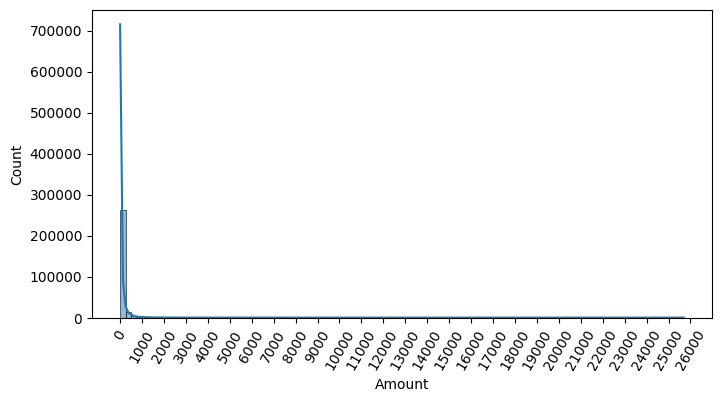

In [51]:
import seaborn as sns
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

여기서 보면 Amount, 즉 카드 사용 금액이 1000불 이하인 데이터가 대부분임을 알 수 있고, 많은 금액을 사용한 경우가 드물지만 발생하면서 꼬리가 긴 형태의 분포 곡선이 나타난다.

In [52]:
from sklearn.preprocessing import StandardScaler
#사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
  #변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrmae 맨 앞 칼럼으로 입력
  df_copy.insert(0,'Amount—Scaled', amount_n)
  #기존 Time, Amount 피처 삭제
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy


함수를 수정한 후 get_train_test_dataset()를 호출하여 학습 데이터 세트를 생성한 후 get_model_train_eval()을 이용하여 로지스틱 회귀와 LightGBM모델을 각각 학습/예측/평가해보도록 하자

In [53]:
#Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행.
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('###로지스틱 회귀 예측 성능 ###')
lr_clf=LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

###로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   55    93]]
정확도:0.9992, 정밀도:0.8692, 재현율0.6284, F1:0.7294, AUC:0.9706
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

이번엔 StandardScaler가 아닌 로그변환을 수행해보자.

In [54]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  #넘파이의 log1p()를 이용해 Amount를 로그 변환
  amount_n=np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy

이제 Amount 피처를 로그 변환한 후 다시 로지스틱 회귀와 LightGBM 모델을 적용한 후 예측 성능을 확인하자.

In [55]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('###로지스틱 회귀 예측 성능###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


###로지스틱 회귀 예측 성능###
오차행렬
[[85282    13]
 [   59    89]]
정확도:0.9992, 정밀도:0.8725, 재현율0.6014, F1:0.7120, AUC:0.9734
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

**이상치 데이터 제거 후 모델 학습/예측/평가**
- 사분위: 전체 데이터를 값이 높은 순으로 정렬하고 이를 1/4 씩으로 구간을 분할하는 것
- IQR: 25% 구간인 Q1~75%구간인 Q3의 범위
- 이상치 데이터 검출: IQR에 1.5를 곱해 생성된 범위를 이용하여 최댓값과 최솟값을 결정하고 최댓값을 초과하거나 최솟값에 미달하는 데이터를 이상치로 간주

<Axes: >

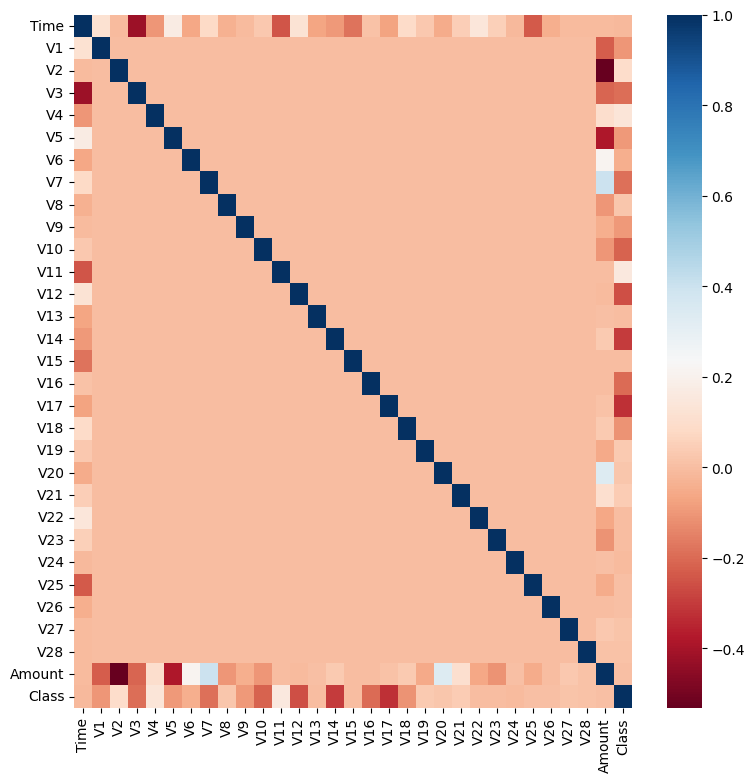

In [56]:
import seaborn as sns
plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

이제 여기서 V14의 이상치만을 찾아 제거하자. 이를 IQR을 이용하여 이상치를 검출하는 함수를 생성한되, 이를 이용해 검출된 이상치를 삭제한다.

In [57]:
import numpy as np
def get_outlier(df=None, column=None, weight=1.5):
  #fraud에 해당하는 column 데이터만 추출, 1/4분위와 3/4분위 지점을 np.percentile로 구함.
  fraud=df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  #IQR을 구하고, IQR에 1.5를 곱해 최댓갑과 최솟값 지점 구함.
  iqr=quantile_75-quantile_25
  iqr_weight=iqr*weight
  lowest_val=quantile_25-iqr_weight
  highest_val=quantile_75+iqr_weight
  #최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환.
  outlier_index=fraud[(fraud < lowest_val)|(fraud > highest_val)].index
  return outlier_index

get_outlier()함수를 이용하여 V14칼럼에서 이상치 데이터를 찾아보자

In [58]:
outlier_index=get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


이제 get_outlier()을 이용해 이상치를 추출하고 삭제하는 로직을 GEt_processed_df()함수에 추가하여 데이터를 가공한 뒤 이를 이용해 로지스틱회귀와 Light GBM 모델을 다시 적용하자

In [59]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0,'Amount—Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  #이상치 데이터 삭제하는 로직 추가
  outlier_index=get_outlier(df=df_copy, column='V14', weight=1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('###로지스틱 회귀 예측 성능###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

###로지스틱 회귀 예측 성능###
오차행렬
[[85280    15]
 [   48    98]]
정확도:0.9993, 정밀도:0.8673, 재현율0.6712, F1:0.7568, AUC:0.9725
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

**SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가**
- SMOTE를 적용시 반드시 학습 데이터 세트만 오버샘플링을 진행
- 그러지 않으면 결국 원본 데이터 세트가 아닌 데이터 세트에서 검증 또는 테스트를 수행하여 올바른 검증 / 테스트가 될 수 없음

In [60]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=0)
X_train_over, y_train_over=smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포:', pd.Series(y_train).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 전 레이블 값 분포: Class
0    199020
1       342
Name: count, dtype: int64


이렇게 생성된 학습 데이터 세트를 기반으로 먼저 로지스틱 회귀 모델을 학습하고 성능을 평가해보자

In [61]:
lr_clf=LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over,
                     tgt_test=y_test)

오차행렬
[[82933  2362]
 [   11   135]]
정확도:0.9722, 정밀도:0.0541, 재현율0.9247, F1:0.1022, AUC:0.9736


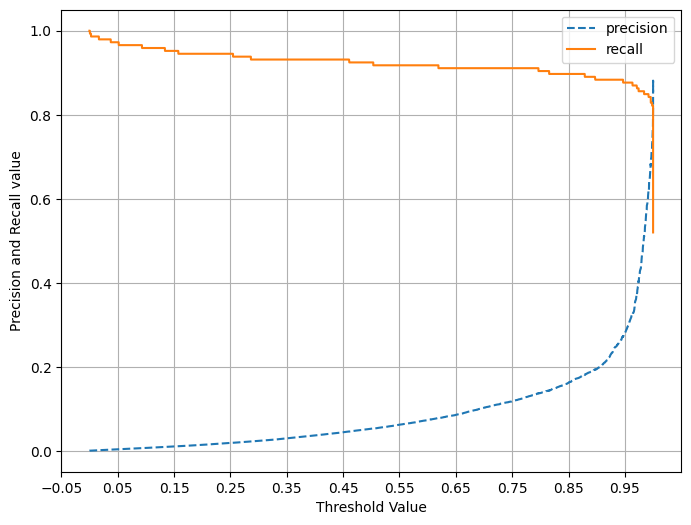

In [62]:
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds=precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold 값으로 Y축은 정밀도, 재현율 순으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    #threshold 값 x축의 Scale을 0.1 단위로 변경
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    #x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:,1])

이번에는 LightGBM 모델을 SDMOTE로 오버 샘플링된 데이터 세트로 학습/예측/ 평가를 수행하자

In [63]:
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)


[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.127953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split